# An analysis of the State of the Union speeches

**Authors:** Yakub Akhmerov, Akhil Jalan, and Ken Zhong

## Abstract

In this project, we sought to explore a dataset of Presidential speeches ranging from 1790 to 2017. There are 227 unique speeches delivered by 42 presidents, which mostly consist of the annual State of the Union Address. By building a "shared vocabulary" consisting of all of the words used in at least one speech, we compared and contrasted Presidents by the frequency with which they used certain words. We mainly used dimensionality reduction techniques for visualization, and built a k-nearest neighbors classifier for prediction. We achieved a classification accuracy of 76% using k-nearest neighbors after a hyperparameter search over $k$. 

## Methods

### Preprocessing

The raw data came in the form of a text file. There was information in the beginnining, stating the president and the date of the given speech. The rest of the document had the speeches themselves, in order. 

In notebook 1, we loaded some simple meta-data (namely the President who gave the speech, the date it was given, and the title of the speech) into a Pandas dataframe. We noted that the majority of speeches in the dataset were delivered in December. 

Also, we noticed a deficiency in the dataset - we lack speeches from Grover Cleveland's second administration, which was from 1893 to 1897. While not a severe impediment, it should be noted that analysis about Grover Cleveland in particular is distored.

### Basic Historical Trends 

In notebook 2, we explored some simple historical trends in speeches, such as number of sentences in a speech. 

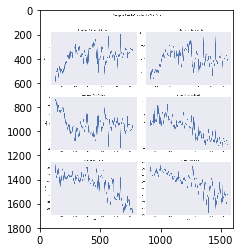

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('fig/speech_changes.png') 
plt.imshow(img, interpolation='none')
plt.show()

We also grouped these trends by President. 

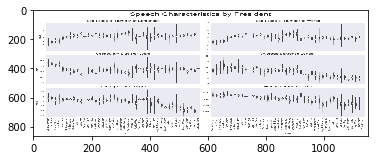

In [5]:
img = mpimg.imread('fig/speech_characteristics.png')
plt.imshow(img, aspect=0.5)
plt.show()

### Speech Vectorization 

After building a common vocabulary of words, in Notebook 3 vectorized the speeches. We represented each speech as a vector whose entries corresponded to the frequencies of those words. 

For example, suppose the entire stemmed vocabulary is ['dog', 'cat', 'bounce'] and the speech in question is 'bouncer bounce cats cat bounce.' Then the vector corresponding to this speech is $\begin{bmatrix} 0 \\ 2 \\ 3 \end{bmatrix}$. 

Given that there are 227 speeches and $n$ unique vocabulary words, we end up with vectors $v_1, ..., v_{227} \in \mathbb{R}^{n}$ corresponding to each speech. 

This vector representation of the speeches opens the door to a variety of analysis methods, all based in a vectorized notion of data. We discuss those analysis methods below. 

## Analysis

### Multidimensional Scaling

In notebook 4, we performed multi-dimensional scaling in order to analyze the data visually. We used two metrics. 

1. Euclidean distance: Also known as the $\ell_2$ norm, this is a reasonable choice because it corresponds to phyiscal distance in $\mathbb{R}^{n}$. 

2. Jensen-Shannon divergence. This is a measure of the divergence of discrete-valued probability distributions, which makes sense after normalizing the word-vectors for each speech to sum to $1$. 

Multidimensional scaling is a form of dimensionality reduction which preserves relative distances. This offers a useful visualization tool and helps us gain intuition. 

In [ ]:
img = mpimg.imread('fig/speech_changes.png') #TODO 
plt.imshow(img, interpolation='none')
plt.show()

### K-Nearest Neighbors 

In notebook 5, we performed a k-nearest neighbors analysis of the vectorized words. Here, vector points are the word vectors and class labels are the name of the President who deliverd the speech. The goal of the classifier is to classify a speech whose speaker is unknown correctly.  

Using hyperparamter tuning, we found that $k=1$ returned the best results: an accuracy rate of 76%. While this is not a high rate, we speculate that this is because variation amongst the speeches of a single President is sometimes stronger than the variation across presidents. K-nearest neighbors assumes that the vectors corresponding to different class labels are highly separated in $\mathbb{R}^{n}$, which our dimensionality reductions indicate might not be the case. 

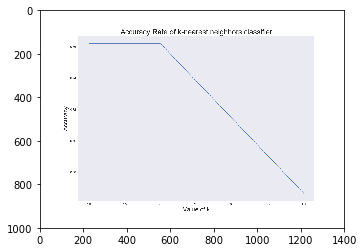

In [5]:
img = mpimg.imread('fig/knn_hyperparam.png') 
plt.imshow(img, interpolation='none')
plt.show()

## Conclusion

While we are unsure whether our preprocessing choices or choice of analysis were what limited our search, the project was nevertheless rewarding and interesting. Evidently, patterns abound in the speeches of presidents, and there are some clear trends in the metadata. There are several avenues for further exploration, including: 

1. What happens when different pre-processing choices are used, such as not stemming (see notebooks 2 and 3 for more detail). 

2. What other classification algorithms, such as Quadratic Discriminant Analysis, would result in. 

3. Whether different choices in the design of the k-nearest neighbors algorithm, such as weighting choice or choice of distance metric, would lead to different outcomes (see notebook 5). 